# DeepLearning and Machine Learning For House Price Prediction

Machine Learning Algorithms
    1. Linear Regression
    2. Decison Tree
    3. KNeighbors 
    4. Ridge
    5. Lasso
    
Deep Learning 

    1.Tensorflow.keras
    2. Pytorch
    
Data set can be downloaded from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Importing Required Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch, torch.nn as nn, torch.nn.functional as F
from pytorch_model_summary import summary
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import torch
import torch.nn as nn
from torch import nn, optim
import torch.nn.functional as F


Using TensorFlow backend.


In [2]:
test_df=pd.read_csv("C://Users//Desktop//Dataset//House-Prices-Advanced-Regression-Techniques-master//test.csv")
train_df=pd.read_csv("C://Users//Desktop//Dataset//House-Prices-Advanced-Regression-Techniques-master//train.csv")

# Exploring Data

In [3]:
print(train_df.shape)
print(test_df.shape)


(1460, 81)
(1459, 80)


In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


# Merging Train and Test data to do preprocessing on whole data

In [8]:
frames = [train_df, test_df]

In [9]:
df=pd.concat(frames)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Deleting worthless features

In [11]:
types=[]
for col in df.columns.unique():
    types.append(df[col].dtypes)


In [12]:
def unique(list1): 
    unique_list = []   
    for x in list1: 
        
        if x not in unique_list: 
            unique_list.append(x) 
   
    for x in unique_list: 
        print (x) 

In [13]:
unique(types)

int64
object
float64


In [14]:
ndf=df.select_dtypes(include=['float64', 'int64'])

In [15]:
ndf.columns.size

38

In [16]:
ndf.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [17]:
df=ndf.drop(['Id'], axis=1)

In [18]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [19]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Cleaning the data

In [20]:
df.isna().sum().any()

True

In [21]:
df=df.fillna(df.median())
columns=df.columns
sale_price=df['SalePrice']
df.isnull().values.any()

False

In [22]:
df.isna().sum().any()

False

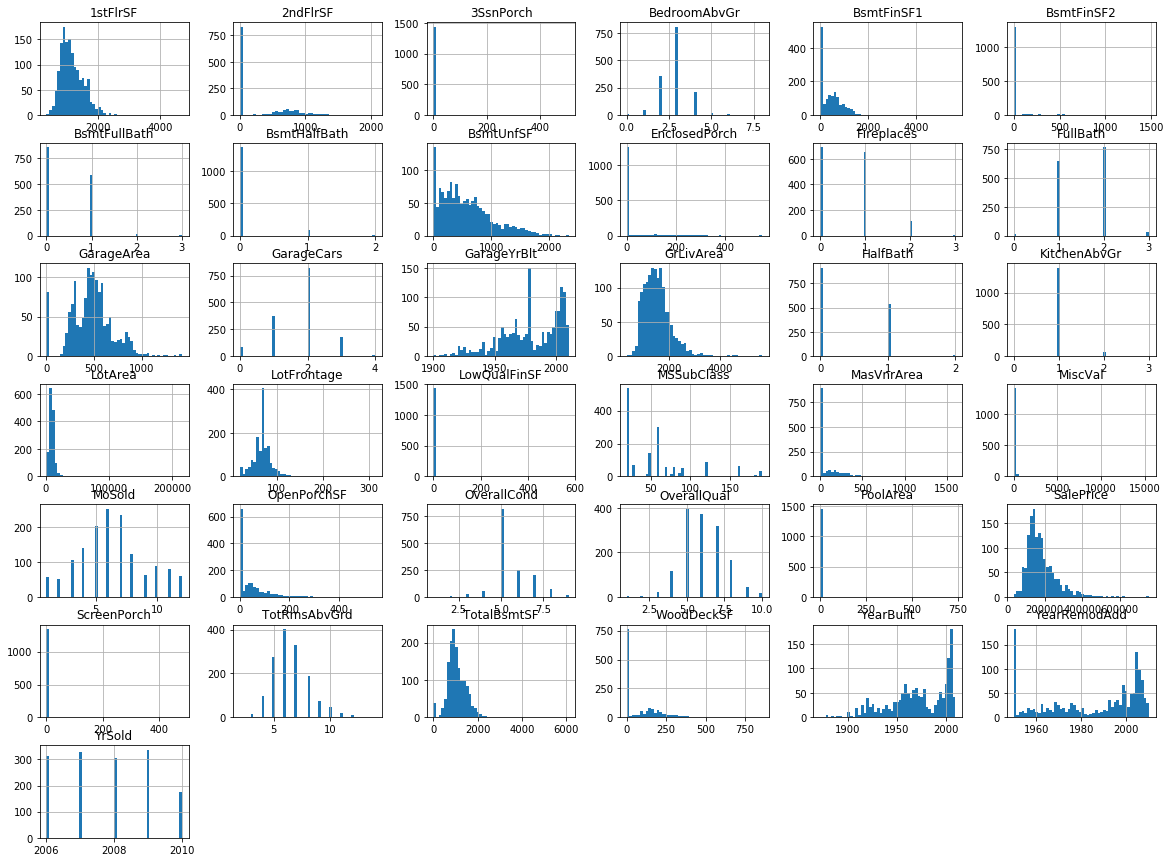

In [23]:
train = df.iloc[:1460]
train.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
edf=df.iloc[:, 10:]
edf.head()

,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,...,0,61,0,0,0,0,0,2,2008,208500.0
1,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,...,0,42,0,0,0,0,0,9,2008,223500.0
3,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,...,192,84,0,0,0,0,0,12,2008,250000.0


# Plotting PairWise relationship between variables

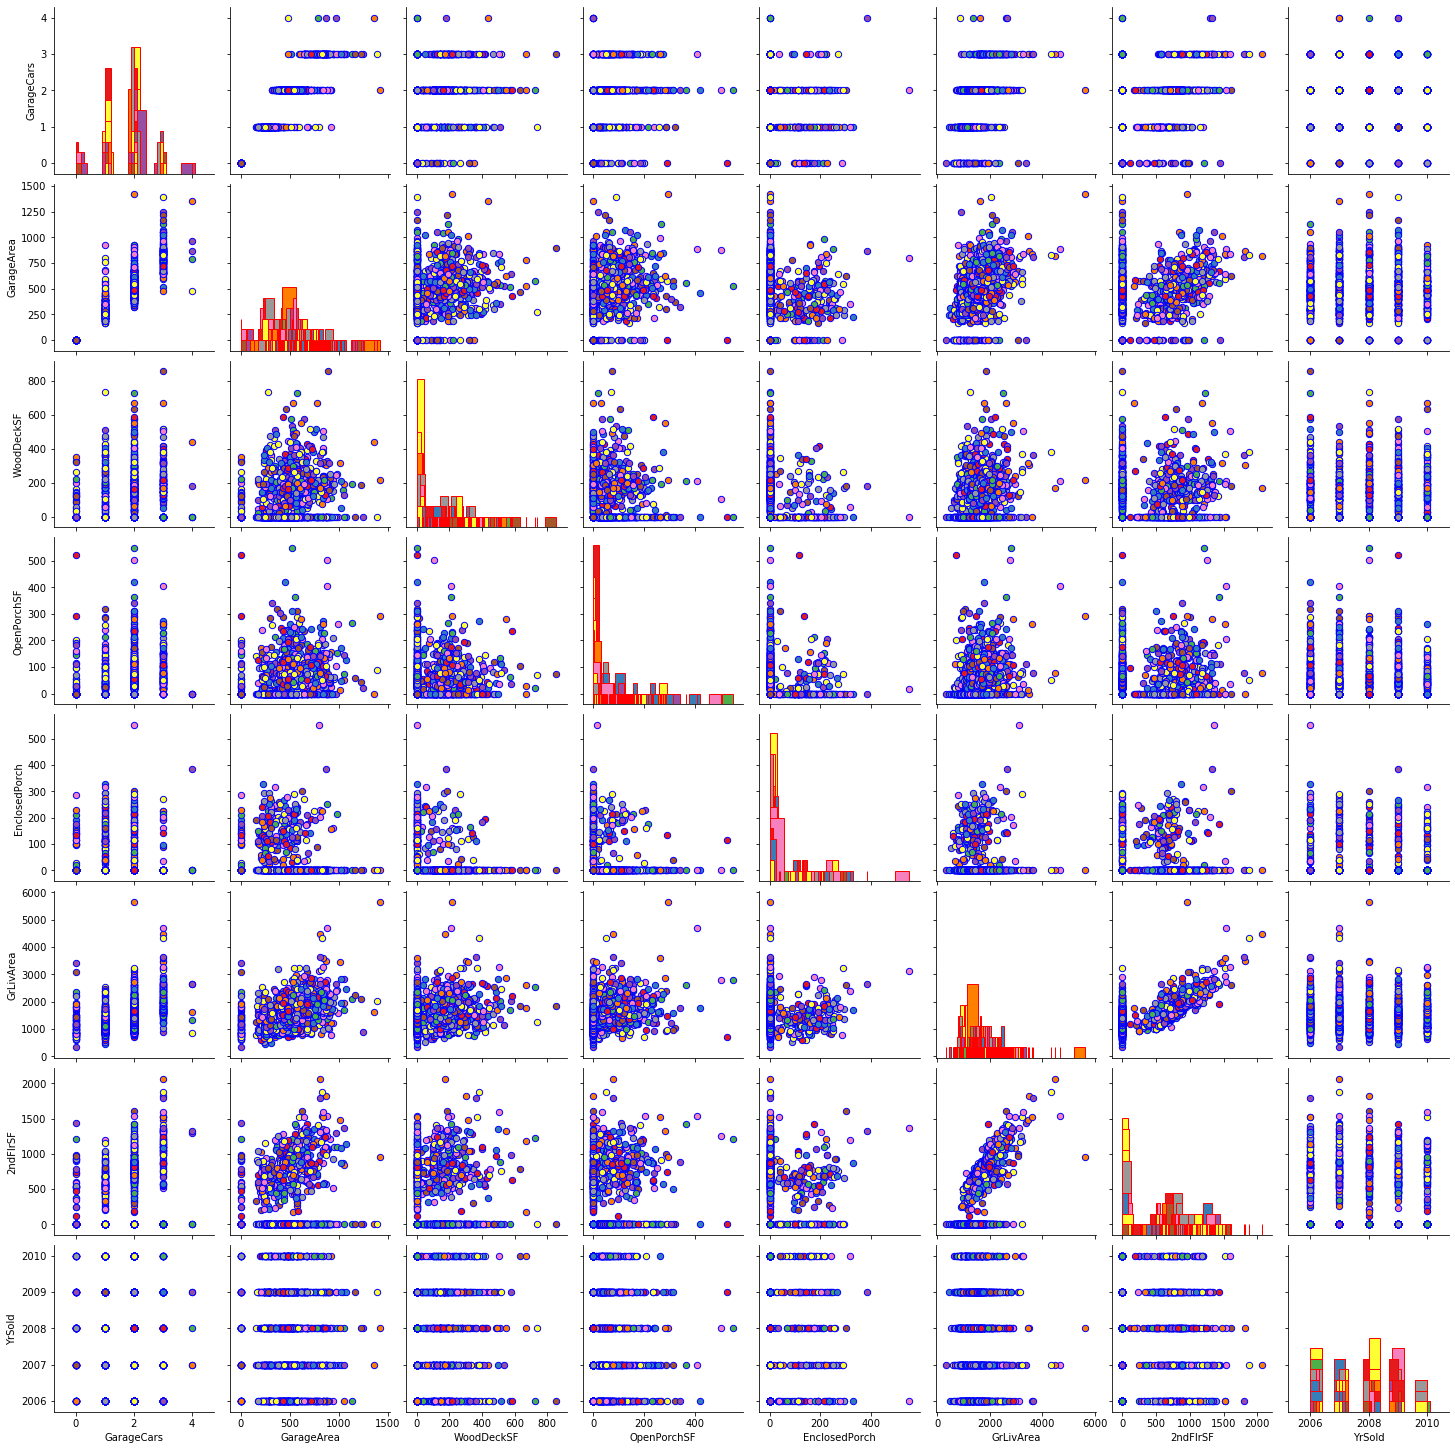

In [25]:
PL = sns.PairGrid(train[["GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","GrLivArea","2ndFlrSF","YrSold","SalePrice"]], hue="SalePrice", palette="Set1")
PL = PL.map_diag(plt.hist, edgecolor="r")
PL = PL.map_offdiag(plt.scatter, edgecolor="b", s=40)
plt.show()

# Plotting Probability Density Function of the SalePrice Feature

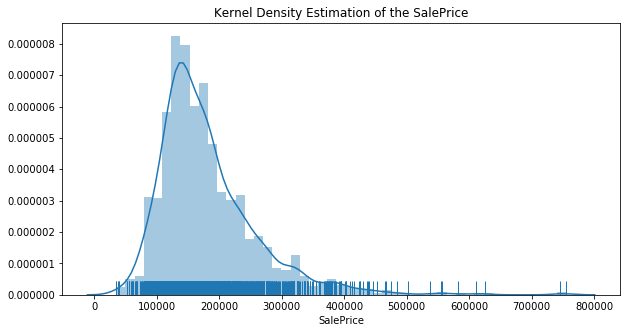

In [23]:
train = df.iloc[:1460]
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'],rug=True)
#sns.kdeplot(Expenditure_Channel2)
plt.title('Kernel Density Estimation of the SalePrice')
plt.show()

# Data Normalization
Normalizing data to help Gradian Descent converge to the optimial point faster

In [25]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = columns)
df['SalePrice'] = sale_price.tolist()
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,208500.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,181500.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,223500.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00,140000.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,250000.0


# Seprating Train data from test data

In [26]:
train = df.iloc[:1460]
test = df.iloc[1460:]
test.drop('SalePrice', axis=1, inplace=True)

C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Plotting Correlation Between Variables

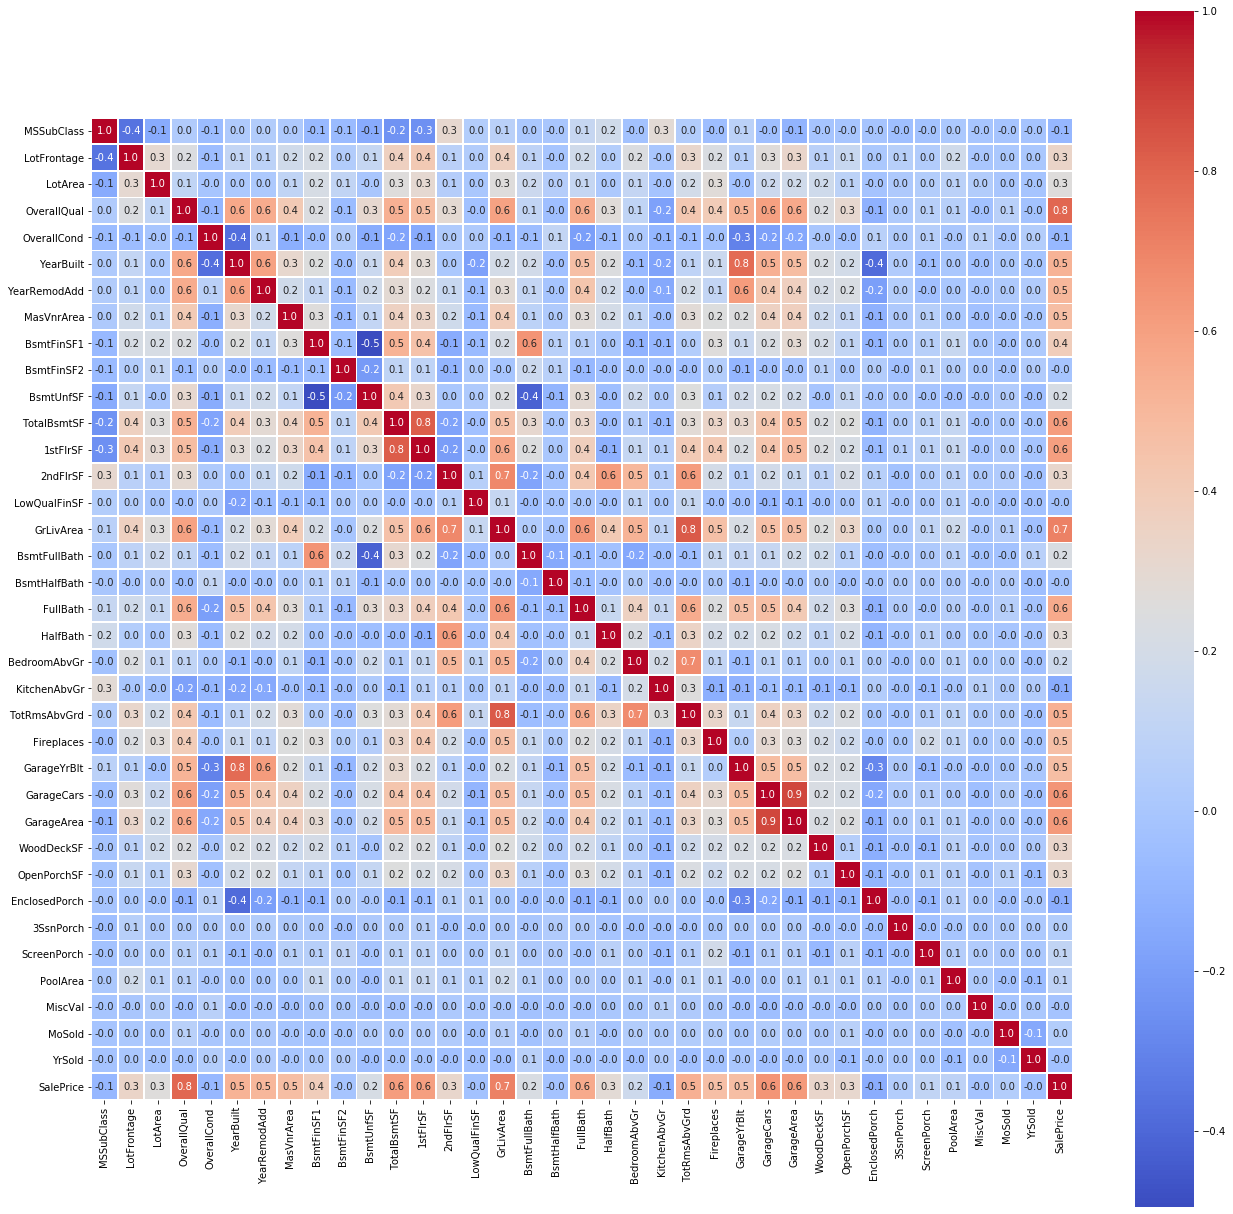

In [26]:
correlation = train.corr() 
f,ax = plt.subplots(figsize=(22, 22))
sns.heatmap(correlation, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.7, ax=ax)

# Removing Highly Correlation Features

In [27]:
correlation = train.corr()
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] >= 0.9 or correlation.iloc[i,j] <= -0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train= train[selected_columns]

print("number of removed features: ", len(df.columns.unique()) - len(selected_columns))

number of removed features:  0


# Removing Correlated features
Besides duplicate features, a dataset can also include correlated features. Correlation is defined as a measure of the linear relationship between two quantitative variables, like height and weight. You could also define correlation is a measure of how strongly one variable depends on another. A high correlation is often a useful property—if two variables are highly correlated, we can predict one from the other. Therefore, we generally look for features that are highly correlated with the target, especially for linear machine learning models. However, if two variables are highly correlated among themselves, they provide redundant information in regards to the target. Essentially, we can make an accurate prediction on the target with just one of the redundant variables. In these cases, the second variable doesn’t add additional information, so removing it can help to reduce the dimensionality and also the added noise (ref: https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-filter-methods-f248e0436ce5).

# Splitting Train Data to Train Data and Validation Data

In [28]:
X_train, X_val, y_train, y_val = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.2, random_state=42)

# Machine Learning and Deep Learning Algorithms for prediction
Machine Learning
    1. Linear Regression
    2. Decison Tree
    3. KNeighborsRegressor
    4. Ridge
    5. Lasso
    
Deep Learning
    1. Tensorflow.Kera
    2. Pytorch

# Linear Regression 

In [29]:
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_val, y_val)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8230938316228187


# Plotting Feature importance for Linear Regression

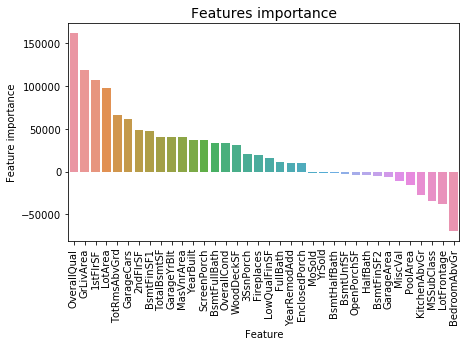

In [30]:
predictors=X_train.columns
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.coef_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# Decision Tree

In [31]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
r_sq = model.score(X_val, y_val)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7995368623125815


# Plotting Feature importance for Decission Tree

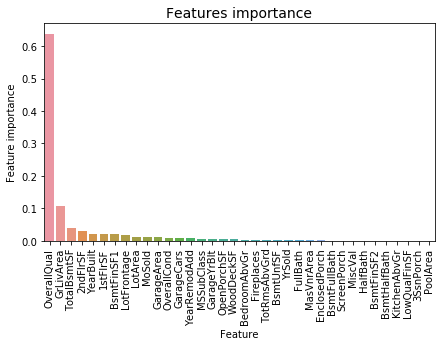

In [32]:
predictors=X_train.columns
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# KNeighborsRegressor

In [33]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
r_sq = model.score(X_val, y_val)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.7529601358749073


# Ridge

In [34]:

model= Ridge().fit(X_train, y_train)
r_sq = model.score(X_val, y_val)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8203133245045647


# Lasso

In [35]:

model= Lasso().fit(X_train, y_train)
r_sq = model.score(X_val, y_val)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8230780995930811


# Deep Learning 
    1. Keras

In [36]:
NCOLS=X_train.shape[1]
features= X_train  
n_cols = features.shape[1]

In [37]:

model = keras.models.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape = (NCOLS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae']) 
early_stopping_monitor =EarlyStopping(patience=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               7400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [39]:
history=model.fit(features, y_train, validation_data=(X_val,y_val), epochs=200, batch_size=32)


Train on 1168 samples, validate on 292 samples
Epoch 1/200
1168/1168 [==============================] - 0s 236us/step - loss: 38883747531.3973 - mae: 181436.7188 - val_loss: 39646147036.9315 - val_mae: 178819.3438
Epoch 2/200
1168/1168 [==============================] - 0s 75us/step - loss: 38831059280.6575 - mae: 181301.3750 - val_loss: 39488288739.9452 - val_mae: 178409.0625
Epoch 3/200
1168/1168 [==============================] - 0s 70us/step - loss: 38310506496.0000 - mae: 179952.4062 - val_loss: 38367401450.9589 - val_mae: 175472.1250
Epoch 4/200
1168/1168 [==============================] - 0s 71us/step - loss: 35964624054.3562 - mae: 173632.1719 - val_loss: 34241309317.2603 - val_mae: 164230.3750
Epoch 5/200
1168/1168 [==============================] - 0s 74us/step - loss: 29224209983.1233 - mae: 153996.7031 - val_loss: 24647033028.3836 - val_mae: 134687.5938
Epoch 6/200
1168/1168 [==============================] - 0s 71us/step - loss: 17463114611.7260 - mae: 112539.0859 - val_l

1168/1168 [==============================] - 0s 71us/step - loss: 2590732466.8493 - mae: 34993.3086 - val_loss: 2082113829.6986 - val_mae: 25802.3984
Epoch 50/200
1168/1168 [==============================] - 0s 69us/step - loss: 2632285345.3151 - mae: 35856.8711 - val_loss: 2028413616.2192 - val_mae: 25865.2070
Epoch 51/200
1168/1168 [==============================] - 0s 61us/step - loss: 2539146822.1370 - mae: 34315.8477 - val_loss: 2073581830.1370 - val_mae: 25525.9297
Epoch 52/200
1168/1168 [==============================] - ETA: 0s - loss: 2571924174.9333 - mae: 34596.02 - 0s 63us/step - loss: 2648195375.3425 - mae: 34312.7383 - val_loss: 2021574709.4795 - val_mae: 25511.2285
Epoch 53/200
1168/1168 [==============================] - 0s 71us/step - loss: 2417898252.2740 - mae: 35001.9062 - val_loss: 2048670910.2466 - val_mae: 25356.2520
Epoch 54/200
1168/1168 [==============================] - 0s 65us/step - loss: 2682536090.3014 - mae: 35658.5938 - val_loss: 1994711765.4795 - val_m

Epoch 99/200
1168/1168 [==============================] - 0s 54us/step - loss: 2575539326.2466 - mae: 34126.7148 - val_loss: 1678082324.1644 - val_mae: 24123.3125
Epoch 100/200
1168/1168 [==============================] - 0s 62us/step - loss: 2838217079.2329 - mae: 36459.9297 - val_loss: 1617271608.1096 - val_mae: 23964.2988
Epoch 101/200
1168/1168 [==============================] - 0s 60us/step - loss: 2649406930.4110 - mae: 35412.4805 - val_loss: 1717809179.6164 - val_mae: 24292.1250
Epoch 102/200
1168/1168 [==============================] - 0s 68us/step - loss: 2541272326.1370 - mae: 34462.0312 - val_loss: 1699427260.4932 - val_mae: 24214.5391
Epoch 103/200
1168/1168 [==============================] - 0s 61us/step - loss: 2385341240.1096 - mae: 34388.7734 - val_loss: 1636859809.3151 - val_mae: 23968.0566
Epoch 104/200
1168/1168 [==============================] - 0s 57us/step - loss: 2572158665.6438 - mae: 35368.2930 - val_loss: 1683964174.0274 - val_mae: 24152.8711
Epoch 105/200
116

Epoch 149/200
1168/1168 [==============================] - 0s 68us/step - loss: 2354709207.6712 - mae: 33450.7969 - val_loss: 1579504649.2055 - val_mae: 23569.0234
Epoch 150/200
1168/1168 [==============================] - 0s 58us/step - loss: 2352778948.3836 - mae: 34311.7656 - val_loss: 1586817759.5616 - val_mae: 23589.8262
Epoch 151/200
1168/1168 [==============================] - 0s 54us/step - loss: 2361463113.6438 - mae: 32952.6484 - val_loss: 1542352926.6849 - val_mae: 23396.5352
Epoch 152/200
1168/1168 [==============================] - 0s 60us/step - loss: 2444233533.3699 - mae: 33856.2148 - val_loss: 1631039618.1918 - val_mae: 23827.8457
Epoch 153/200
1168/1168 [==============================] - 0s 59us/step - loss: 2735354729.2055 - mae: 35410.2109 - val_loss: 1618564879.3425 - val_mae: 23725.9297
Epoch 154/200
1168/1168 [==============================] - 0s 59us/step - loss: 2199896719.7808 - mae: 32857.5234 - val_loss: 1594408338.4110 - val_mae: 23585.9238
Epoch 155/200
11

Epoch 199/200
1168/1168 [==============================] - 0s 67us/step - loss: 2519163414.7945 - mae: 33495.6797 - val_loss: 1546159902.2466 - val_mae: 23344.7793
Epoch 200/200
1168/1168 [==============================] - 0s 62us/step - loss: 2371202619.6164 - mae: 33685.9062 - val_loss: 1501232789.0411 - val_mae: 23097.6680


# Plotting the Training Loss

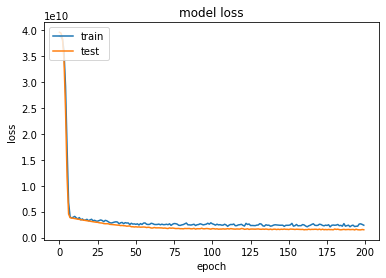

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2. Pytorch

     4-layer structure for our model

In [41]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(36, 24)
        self.fc2 = nn.Linear(24, 18)
        self.fc3 = nn.Linear(18, 10)
        self.fc4 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        #x=F.dropout(x, p=0.1)
        x = F.relu(self.fc2(x))
        #x=F.dropout(x, p=0.1)
        x = F.relu(self.fc3(x))
        #x=F.dropout(x, p=0.1)
        x = F.relu(self.fc4(x))

        return x

model = Model()    
print(summary(model,torch.zeros((1,36)), show_input=True))
print(summary(model,torch.zeros((1,36)), show_input=False))
print(summary(model,torch.zeros((1,36)), show_input=False, show_hierarchical=True))

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
          Linear-1             [1, 36]             888             888
          Linear-2             [1, 24]             450             450
          Linear-3             [1, 18]             190             190
          Linear-4             [1, 10]              11              11
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
-----------------------------------------------------------------------
-----------------------------------------------------------------------
      Layer (type)        Output Shape         Param #     Tr. Param #
          Linear-1             [1, 24]             888             888
          Linear-2             [1, 18]             450             450
          Linear-3             [1, 10]             190             190
          Linear-4              [1, 1]              11              11
Total 

# Spliting the train data into batches

In [42]:
def batch(X,y, num_batch):
    nX= np.array_split(X, num_batch)
    ny= np.array_split(y, num_batch)
    return nX, ny

BX_train,By_train=batch(X_train, y_train, 20)

X_val = torch.from_numpy(np.array(X_val)).float() 
y_val = torch.from_numpy(np.array(y_val)).float().view(-1, 1)

# Training the Model

In [48]:
model =Model()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [49]:
iter=0
test_loss=0
epochs = 1000
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for i in range(len(BX_train)):
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        # Convert numpy array to torch Variable and then Forward to get output
        output = model(torch.from_numpy(np.array(BX_train[i])).float())
         # Calculate Loss
        loss =(criterion((output), (torch.from_numpy(np.array(By_train[i])).float().view(-1, 1))))
        # Getting gradients w.r.t. parameters
        loss.backward()
        # Updating parameters
        optimizer.step()
        # we need to add the loss of all batches 
        train_loss += loss.item()
        iter+=1
        
        if iter%100==0:
            test_loss = 0
            model.eval()
            Outputs= model(X_val)
            test_loss=(criterion((Outputs),(y_val))) 
            print("Epoch: {} ".format(epoch),"Training Loss: {:.3f} ".format(train_loss),"Test Loss: {:.3f} ".format(test_loss))

Epoch: 4  Training Loss: 45367483392.000  Test Loss: 2816819200.000 
Epoch: 9  Training Loss: 31902394432.000  Test Loss: 1811165184.000 
Epoch: 14  Training Loss: 29067379264.000  Test Loss: 1578011648.000 
Epoch: 19  Training Loss: 27797775808.000  Test Loss: 1501789440.000 
Epoch: 24  Training Loss: 26876195264.000  Test Loss: 1451897088.000 
Epoch: 29  Training Loss: 26179205408.000  Test Loss: 1414492928.000 
Epoch: 34  Training Loss: 25672726784.000  Test Loss: 1388198528.000 
Epoch: 39  Training Loss: 25334420256.000  Test Loss: 1371265280.000 
Epoch: 44  Training Loss: 25120424256.000  Test Loss: 1361335296.000 
Epoch: 49  Training Loss: 24984825728.000  Test Loss: 1355798272.000 
Epoch: 54  Training Loss: 24892701344.000  Test Loss: 1353021184.000 
Epoch: 59  Training Loss: 24826348384.000  Test Loss: 1351789696.000 
Epoch: 64  Training Loss: 24775593504.000  Test Loss: 1351253504.000 
Epoch: 69  Training Loss: 24728831296.000  Test Loss: 1350185344.000 
Epoch: 74  Training Lo

Epoch: 594  Training Loss: 16126448112.000  Test Loss: 985843904.000 
Epoch: 599  Training Loss: 16174694592.000  Test Loss: 986616960.000 
Epoch: 604  Training Loss: 16250028832.000  Test Loss: 1001509952.000 
Epoch: 609  Training Loss: 16032307136.000  Test Loss: 987883072.000 
Epoch: 614  Training Loss: 16113504064.000  Test Loss: 987064832.000 
Epoch: 619  Training Loss: 16094547456.000  Test Loss: 998194880.000 
Epoch: 624  Training Loss: 15945640288.000  Test Loss: 984999488.000 
Epoch: 629  Training Loss: 16007647808.000  Test Loss: 983332544.000 
Epoch: 634  Training Loss: 16075816256.000  Test Loss: 997342016.000 
Epoch: 639  Training Loss: 15837331360.000  Test Loss: 981657024.000 
Epoch: 644  Training Loss: 15914414016.000  Test Loss: 981353920.000 
Epoch: 649  Training Loss: 15972249408.000  Test Loss: 993385728.000 
Epoch: 654  Training Loss: 15798855584.000  Test Loss: 979864512.000 
Epoch: 659  Training Loss: 15870971136.000  Test Loss: 978071616.000 
Epoch: 664  Trainin

Note: From the results we can conclude that we need more data to train our Neural Networks better